In [2]:
# pip install ipython==6.1.0 jupyter==1.0.0 matplotlib==2.0.2 
# pip install numpy==1.13.3 pandas==0.20.3 pandas-datareader==0.5.0 scikit-learn==0.19.0
import datetime 
import pandas_datareader.data as web
import IPython.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [7]:
# データを取得
df_btcjpy = web.get_data_yahoo('BTC-JPY', start=datetime.datetime(2014, 1, 1), end=datetime.datetime(2019, 9, 3))
df_btcjpy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,84498.000000,80000.000000,83499.000000,83745.000000,29278885,83745.000000
2014-01-01,87102.078125,79138.609375,83745.000000,85000.000000,391077,85000.000000
2014-01-02,91247.000000,83540.890625,85000.000000,87547.078125,25696,87547.078125
2014-01-03,92770.000000,87000.000000,87547.078125,92116.312500,30838,92116.312500
2014-01-04,95500.000000,87438.437500,92116.312500,94090.867188,72503,94090.867188


In [9]:
df_btceth= web.get_data_yahoo('BTC-ETH', start=datetime.datetime(2014, 1, 1), end=datetime.datetime(2019, 9, 3))
df_btceth.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,355.869995,10.000000,355.869995,100.199997,53584,100.199997
2015-08-07,434.029999,100.199997,100.199997,320.200012,722558,320.200012
2015-08-08,436.679993,275.410004,320.200012,355.239990,737119,355.239990
2015-08-09,439.559998,345.179993,355.239990,384.619995,585917,384.619995
2015-08-10,410.850006,230.889999,384.619995,253.940002,1479695,253.940002


In [10]:
df_btcjpy.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-01,1109123.500,1.035852e+06,1.036736e+06,1101778.500,10037710651,1101778.500
2019-09-02,1141297.625,1.090260e+06,1.101778e+06,1130057.875,13233435339,1130057.875


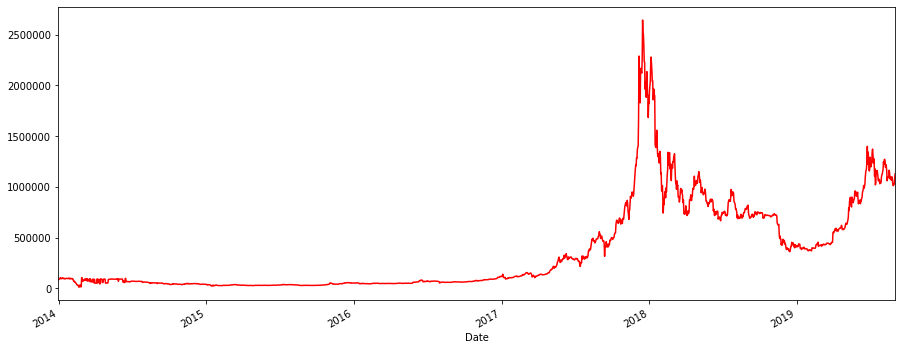

In [11]:
# 移動平均
df_btcjpy['SMA'] = df_btcjpy['Close'].rolling(window=14).mean()
df_btcjpy['Close'].plot(figsize=(15,6), color="red")
plt.show()

In [12]:
# データの整形
df_btcjpy['change'] = (((df_btcjpy['Close'] - df_btcjpy['Open'])) / (df_btcjpy['Open']) * 100)

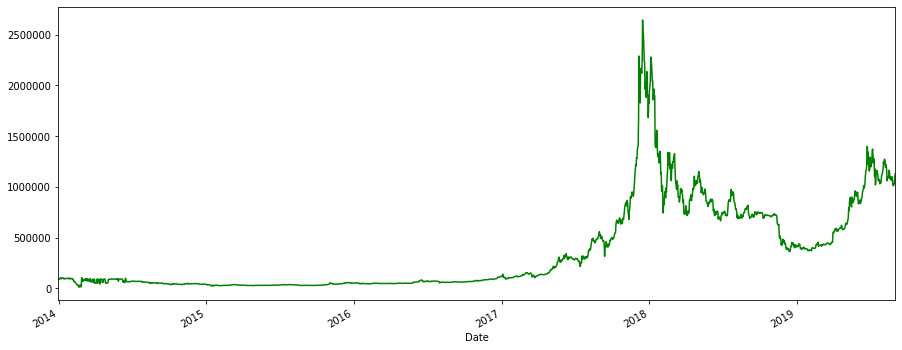

In [13]:
# データの表示
df_btcjpy['Close'].plot(figsize=(15,6), color="green")
plt.show()

In [14]:
# 機械学習ようにコラムを追加
df_btcjpy['label'] = df_btcjpy['Close'].shift(-30)
df_btcjpy.tail(100)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2019-05-26,9.747381e+05,9.457288e+05,9.536691e+05,9.600585e+05,13573509952,9.600585e+05,8.778445e+05,0.669985,1398997.000
2019-05-27,9.638898e+05,9.397449e+05,9.600585e+05,9.527258e+05,8287781290,9.527258e+05,8.833591e+05,-0.763782,1221981.500
2019-05-28,9.558088e+05,9.236486e+05,9.527258e+05,9.484305e+05,9145823720,9.484305e+05,8.870768e+05,-0.450838,1342956.625
2019-05-29,9.896431e+05,8.821968e+05,9.484305e+05,9.075308e+05,16111683026,9.075308e+05,8.899694e+05,-4.312361,1290744.750
2019-05-30,9.310398e+05,8.897583e+05,9.075308e+05,9.283501e+05,12785875809,9.283501e+05,8.981584e+05,2.294068,1171484.500
2019-05-31,9.324528e+05,9.164166e+05,9.283501e+05,9.245823e+05,7235337958,9.245823e+05,9.069832e+05,-0.405861,1156068.875
2019-06-01,9.544079e+05,9.240328e+05,9.245823e+05,9.464739e+05,7822589914,9.464739e+05,9.103445e+05,2.367725,1173967.875
2019-06-02,9.471181e+05,8.775699e+05,9.464739e+05,8.798864e+05,10556535111,8.798864e+05,9.104240e+05,-7.035317,1291234.750
2019-06-03,8.803285e+05,8.078551e+05,8.798864e+05,8.320118e+05,16518745128,8.320118e+05,9.070549e+05,-5.441008,1206281.750


In [15]:
# 機械学習のためのデータの用意

# 右端の行を削除したデーターを変数X に投入、これが元データとなる
X = np.array(df_btcjpy.drop(['label','SMA'], axis=1))
#sklearn.procssing.scale で　Xにいれた　データを標準化　
X = sklearn.preprocessing.scale(X)

# 予測に使う過去30日間のデーター　を predict_dataに用意＝これが予測値に使うデータとなる
predict_data = X[-30:]

# 過去30日を取り除いた入力データー　
X = X[:-30]


y = np.array(df_btcjpy['label'])
# 過去30日を取り除いた実測値データ（label)
y = y[:-30]

# 訓練データー80% 検証データー 20%に分ける
# 第一引数に入力データー、第２引数に実測値データ(label)の配列
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size = 0.2)

# 訓練データーを用いて線形学習させる
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)

# 検証データーを用いて検証してみる
accuracy = lr.score(X_test, y_test)
accuracy

0.8222166566174876

In [16]:
# 先ほど作成した予測データを、lr.predict　で予測させて、predicted_data という変数に投入
predicted_data = lr.predict(predict_data)
predicted_data

array([1461592.2082677 , 1545079.54248829, 1514606.97201791,
       1352683.53073338, 1263329.54241383, 1169217.1135919 ,
       1091673.28213741, 1052944.34018067, 1120754.42657788,
       1211136.43781809, 1336134.90589784, 1339787.75872854,
       1088995.3770024 , 1057752.78181012, 1108625.49203615,
       1132358.5262982 , 1182445.28482331, 1115309.63613543,
       1078904.61252477, 1012742.07296452, 1078767.51330949,
       1241042.35349323,  951805.88555696,  773162.01812404,
        757209.86017137,  743514.16147432,  728495.61885952,
        741558.94345788,  787021.18389209,  870836.24264269])

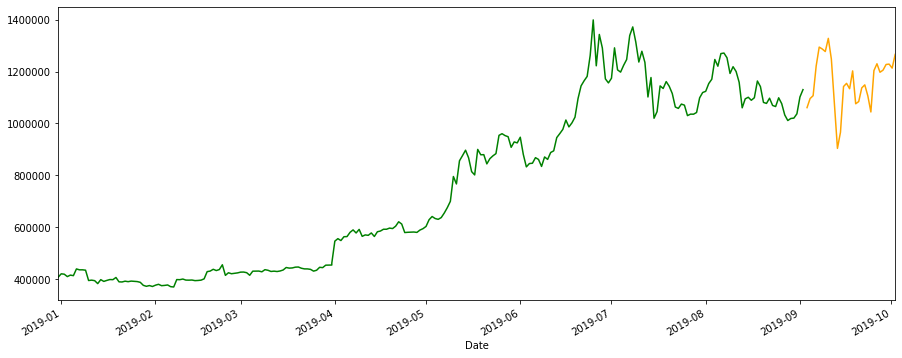

In [104]:
df_btcjpy['Predict'] = np.nan　　　　   #予測値を　np.nan に投入 <<< nanは not a nomber (非数の略です)

last_date = df_btcjpy.iloc[-1].name #  最終日をlast_dateに投入します。

one_day = 86400　　　　#１日は86400秒なのでそれを one_dayに投入
next_unix = last_date.timestamp() + one_day　#次の日を前日 + 86400秒として定義

for data in predicted_data:　　# 　先程作成したpredicted_data を変数で回す
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_btcjpy.loc[next_date] = np.append([np.nan]* (len(df_btcjpy.columns)-1), data)

#実測値を緑色、予測値をオレンジで装画
df_btcjpy['Close'].plot(figsize=(15,6), color="green")
df_btcjpy['Predict'].plot(figsize=(15,6), color="orange")
plt.show()

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
lr = sklearn.ensemble.GradientBoostingClassifier()
lr.fit(X_train,y_train)
accuracy = lr.score(X_test, y_test)
accuracy

ValueError: Unknown label type: 'continuous'

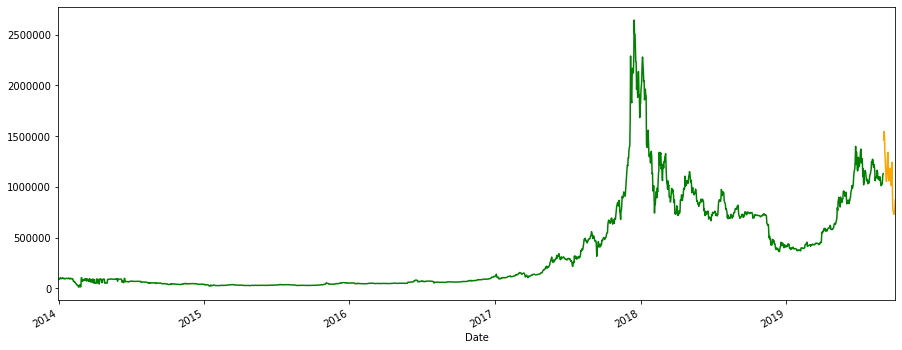

In [24]:
df_btcjpy['Predict'] = np.nan
last_date = df_btcjpy.iloc[-1].name #  最終日をlast_dateに投入します。

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_btcjpy.loc[next_date] = np.append([np.nan]* (len(df_btcjpy.columns)-1), data)

#実測値を緑色、予測値をオレンジで装画
df_btcjpy['Close'].plot(figsize=(15,6), color="green")
df_btcjpy['Predict'].plot(figsize=(15,6), color="orange")
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)